#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../../ex02/template'))

you can now import your desired files, for example, we can import grid_search.py with:

In [2]:
import grid_search as gs  # You then need to call your functions using gs.function_name()
import costs
# Let's try to call generate_w from grid_search.py:
w0, w1 = gs.generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from test_utils import test

%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [4]:
from costs import compute_loss
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    w = np.linalg.inv(tx.T @ tx) @ tx.T @ y
    mse = compute_loss(y, tx, w)
    return w, mse


### You can test your implementation here

In [5]:
test(least_squares)
# NB:
#
# Due to precision issues,
# the output might not be exactly the same
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily mean
# your implementation is wrong.:)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 14, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 9.557427349021658e-33)
**********************************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [6]:

def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: 
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    # ***************************************************
    w, mse = least_squares(y, tx)
    print("least squares: ", w, mse)
    w0, w1 = gs.generate_w(5)
    losses = gs.gd_search(y, tx, w0, w1)
    loss, best_w0, best_w1 = gs.get_best_parameters(w0, w1, losses)
    print("grid search: ", best_w0, best_w1, loss)
    
    

Test it here

In [7]:
test_your_least_squares()

least squares:  [73.293922   13.47971243] 0.00153858878688294
grid search:  50.0 0.0 0.03775406126539084


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [8]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [9]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    N = x.shape[0]
    poly = np.zeros((N, degree+1))
    for i in range(N):
        for j in range(degree+1):
            poly[i, j] = x[i]**j
    return poly


In [10]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Once your implementation of `build_poly` passes the test, copy it to `build_polynomial.py`
Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [11]:
from plots import *
from build_polynomial import build_poly

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
    and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]

    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    global x, y
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        x, mean_x, std_x = standardize(x)
        tx = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights, mse = least_squares(y, tx)
        rmse = np.sqrt(2 * mse)

        print(
            "Processing {i}th experiment, degree={d}, rmse={loss}".format(
                i=ind + 1, d=degree, loss=rmse
            )
        )
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.06673335515781588
Processing 2th experiment, degree=3, rmse=0.03656912697732367
Processing 3th experiment, degree=7, rmse=0.03530707246084387
Processing 4th experiment, degree=12, rmse=0.03398709799748933


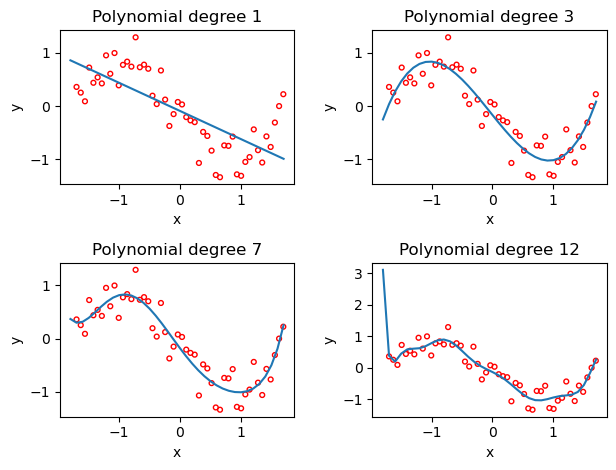

In [12]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [13]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.

    >>> split_data(np.arange(13), np.arange(13), 0.8, 1)
    (array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]), array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]))
    """
    # set seed
    np.random.seed(seed)
    indices = np.random.permutation(x.shape[0])
    train_indices = indices[:int(np.floor(ratio * x.shape[0]))]
    test_indices = indices[int(np.floor(ratio * x.shape[0])):]
    x_tr = x[train_indices]
    x_te = x[test_indices]
    y_tr = y[train_indices]
    y_te = y[test_indices]
    return x_tr, x_te, y_tr, y_te


In [14]:
test(split_data)

✅ Your `split_data` passed 1 tests.


Then, test your `split_data` function below.

In [15]:
from costs import compute_mse
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees.

    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    weights, mse = least_squares(y_tr, tx_tr)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * mse)
    mse_te = compute_mse(y_te, tx_te, weights)
    rmse_te = np.sqrt(2 * mse_te)
    print(
        "proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
            p=ratio, d=degree, tr=rmse_tr, te=rmse_te
        )
    )
    return x_tr, x_te, y_tr, y_te, weights



Demo time

proportion=0.9, degree=1, Training RMSE=0.074, Testing RMSE=0.081
proportion=0.9, degree=3, Training RMSE=0.039, Testing RMSE=0.092
proportion=0.9, degree=7, Training RMSE=0.038, Testing RMSE=0.098
proportion=0.9, degree=12, Training RMSE=0.036, Testing RMSE=0.112
proportion=0.7, degree=1, Training RMSE=0.087, Testing RMSE=0.091
proportion=0.7, degree=3, Training RMSE=0.042, Testing RMSE=0.080
proportion=0.7, degree=7, Training RMSE=0.038, Testing RMSE=0.086
proportion=0.7, degree=12, Training RMSE=0.038, Testing RMSE=0.084
proportion=0.5, degree=1, Training RMSE=0.091, Testing RMSE=0.106
proportion=0.5, degree=3, Training RMSE=0.048, Testing RMSE=0.059
proportion=0.5, degree=7, Training RMSE=0.046, Testing RMSE=0.057
proportion=0.5, degree=12, Training RMSE=0.041, Testing RMSE=0.213
proportion=0.1, degree=1, Training RMSE=0.191, Testing RMSE=0.080
proportion=0.1, degree=3, Training RMSE=0.038, Testing RMSE=0.069
proportion=0.1, degree=7, Training RMSE=2.683, Testing RMSE=1.208
proport

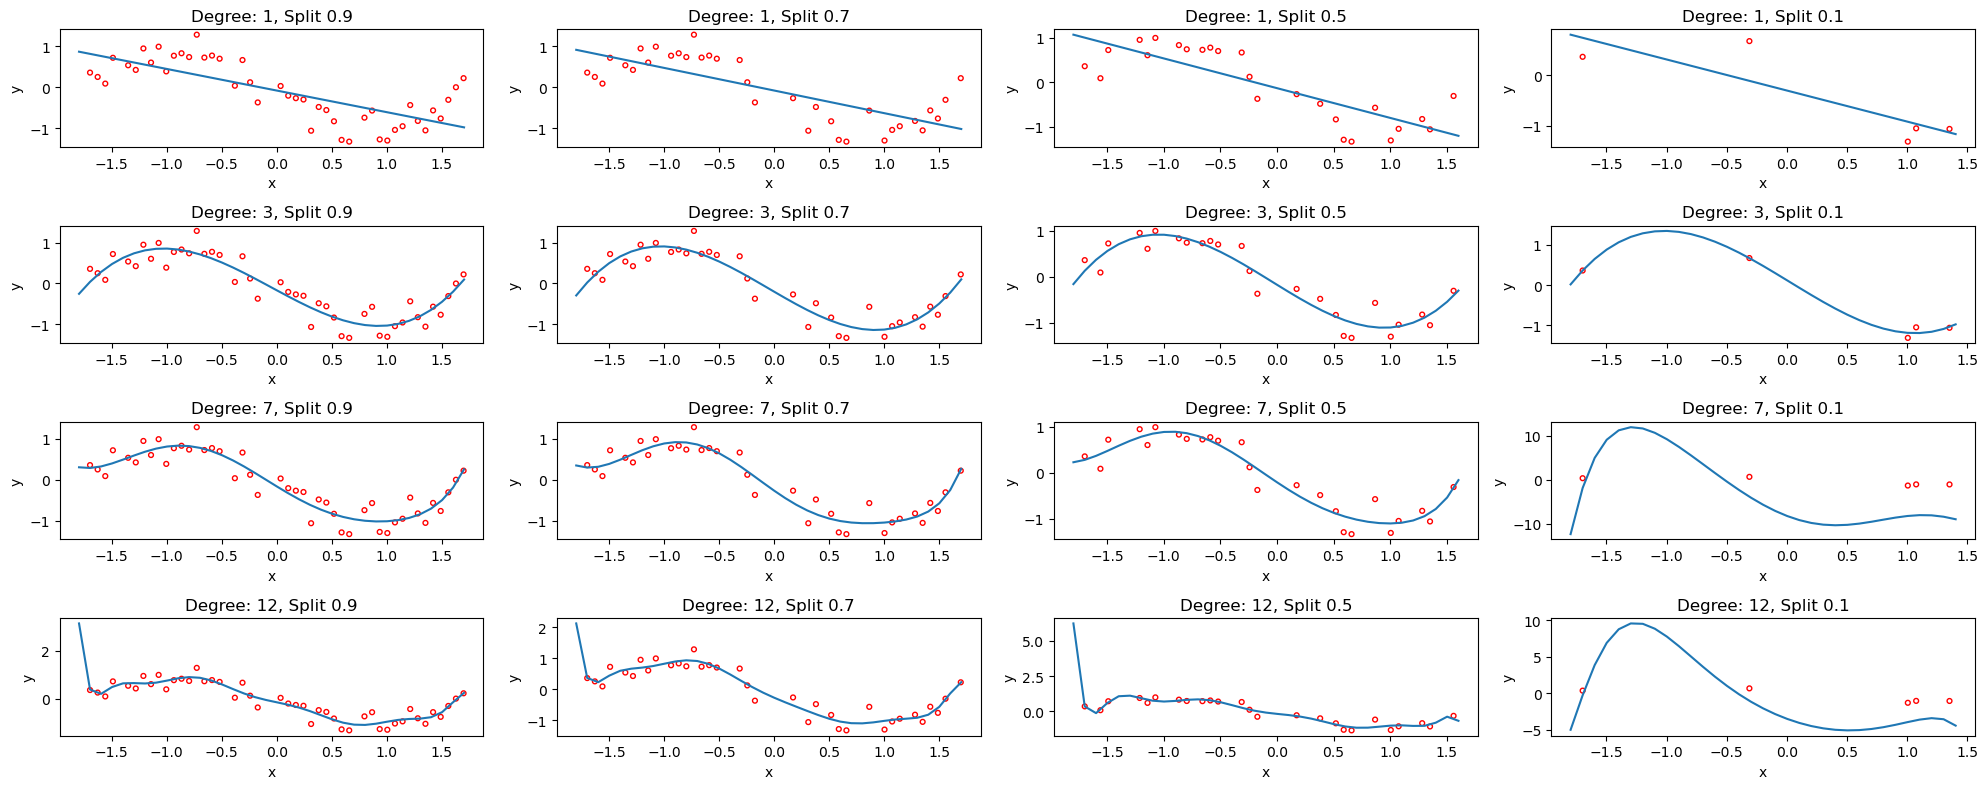

In [16]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20, 8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(
            x, y, degree, split_ratio, seed
        )
        plot_fitted_curve(y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f"Degree: {degree}, Split {split_ratio}")
plt.tight_layout()

Your graph should look like this:

![alt text](split_demo.png)

# Ridge Regression
Please fill in the function below.

In [17]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    N, D = tx.shape
    w = np.linalg.inv(tx.T @ tx + 2 * N * lambda_ * np.eye(D)) @ tx.T @ y
    return w
    

In [18]:
test(ridge_regression)

✅ Your `ridge_regression` passed 2 tests.


In [19]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        w = ridge_regression(y_tr, tx_tr, lambda_)
        mse_tr = compute_mse(y_tr, tx_tr, w)
        mse_te = compute_mse(y_te, tx_te, w)
        rmse_tr.append(np.sqrt(2 * mse_tr))
        rmse_te.append(np.sqrt(2 * mse_te))
        print(
            "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]
            )
        )
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.045, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.045, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.045, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.045, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.045, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.045, Testing RMSE=0.069
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.046, Testing RMSE=0.070
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.046, Testing RMSE=0.072
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.047, Testing RMSE=0.074
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.049, Testing RMSE=0.077
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.054, Testing RMSE=0.079
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.063, Testing RMSE=0.084
proportion=0.5, degree=7, lambda=0.193, 

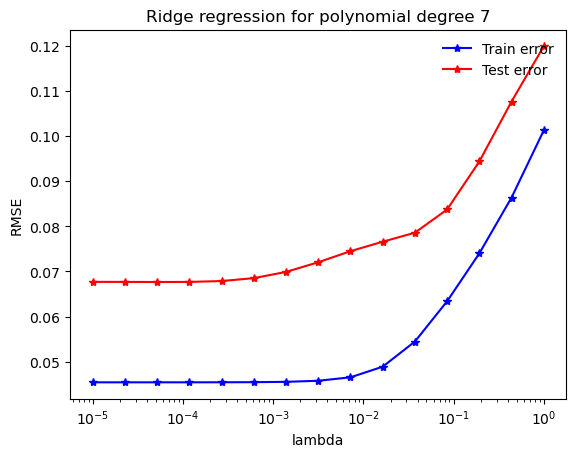

In [20]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [21]:
import matplotlib.pyplot as plt
def compare_ridge_mse(degree, ratio, seed):
    """Compare ridge regression and least squares regression."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    global x, y

    # split the data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)

    # form train and test data with polynomial basis function
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # Ridge regression
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        w = ridge_regression(y_tr, tx_tr, lambda_)
        mse_tr = compute_mse(y_tr, tx_tr, w)
        mse_te = compute_mse(y_te, tx_te, w)
        rmse_tr.append(np.sqrt(2 * mse_tr))
        rmse_te.append(np.sqrt(2 * mse_te))

    # Least squares regression
    w_ls, loss = least_squares(y_tr, tx_tr)
    mse_tr_ls = compute_mse(y_tr, tx_tr, w_ls)
    mse_te_ls = compute_mse(y_te, tx_te, w_ls)
    rmse_tr_ls = np.sqrt(2 * mse_tr_ls)
    rmse_te_ls = np.sqrt(2 * mse_te_ls)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.semilogx(lambdas, rmse_tr, color="b", marker="*", label="Ridge Train error")
    plt.semilogx(lambdas, rmse_te, color="r", marker="*", label="Ridge Test error")
    plt.axhline(y=rmse_tr_ls, color='g', linestyle='--', label="Least Squares Train error")
    plt.axhline(y=rmse_te_ls, color='y', linestyle='--', label="Least Squares Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge vs Least Squares for polynomial degree " + str(degree))
    plt.legend(loc=1, shadow=True)
    plt.show()

# Example usage
compare_ridge_mse(degree, split_ratio, seed)
    """
    from the picture, we can see that when lambda is small, the ridge regression is similar to the least squares regression.
    for low dimension and small data, no obvious difference between ridge and least squares.
    ridge regression is more like a regularizer for least squares to have more sparse weights.
    when lambda is large, the ridge regression is more like a shrinkage estimator for least squares.
    """


IndentationError: unexpected indent (371666356.py, line 46)

Your plot should look like:

![alt text](ridge_regression.png)